#### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#### Loading the dataset 

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

<img src="fashion-mnist-sprite.png" />

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

#### Define the classes

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Data Visualization

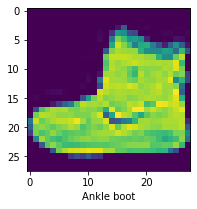

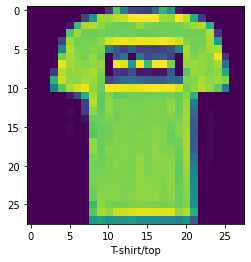

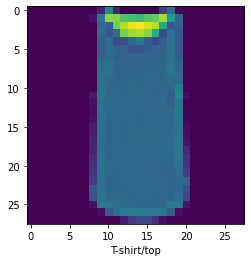

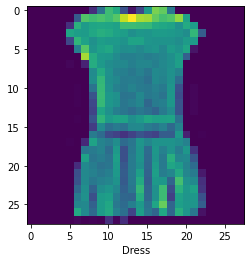

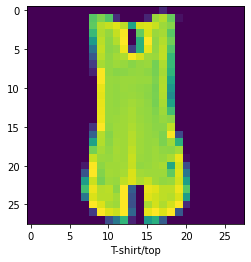

In [6]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.show()

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Data Preprocessing

##### Scale images

In [8]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [11]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Initializing the ANN

In [12]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(500, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])


#### Compiling the ANN

In [13]:
model.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

#### Training the ANN on the Training set

In [14]:
history =  model.fit(X_train_scaled, y_train_categorical, batch_size = 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.9002 - accuracy: 0.7220
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4822 - accuracy: 0.8334
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4281 - accuracy: 0.8518
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4018 - accuracy: 0.8587
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3847 - accuracy: 0.8653
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3666 - accuracy: 0.8720
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3504 - accuracy: 0.8781
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3341 - accuracy: 0.8824
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3234 - accuracy: 0.8843
Epoch 10/10
1875/1875 [==============================] - 23s 12m

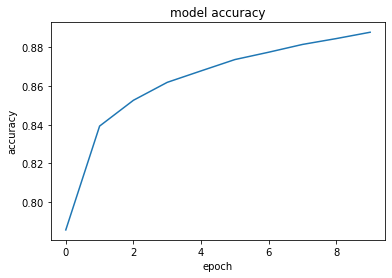

In [15]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

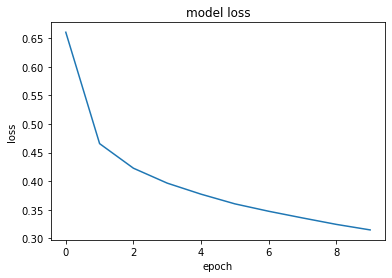

In [16]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### Evaluate the model

In [17]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 5ms/step - loss: 0.3595 - accuracy: 0.8724


[0.35949042439460754, 0.8723999857902527]

#### classification report

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report")
print(classification_report(y_test,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.80      0.78      1000
           3       0.85      0.90      0.87      1000
           4       0.76      0.83      0.79      1000
           5       0.97      0.94      0.96      1000
           6       0.75      0.59      0.66      1000
           7       0.92      0.95      0.94      1000
           8       0.94      0.97      0.95      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### Heatmap

Text(69.0, 0.5, 'Truth')

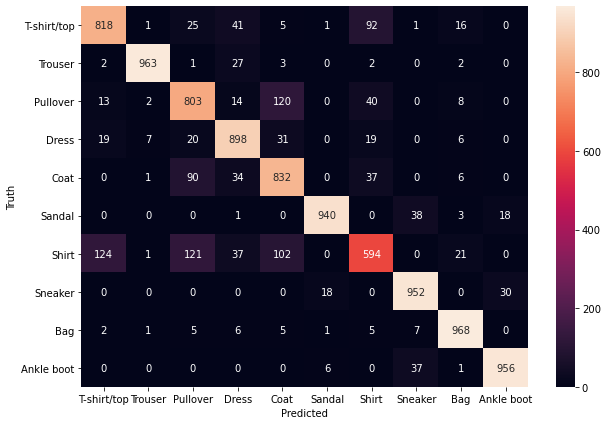

In [19]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_classes)
plt.figure(figsize = (10,7))
sn.heatmap(data=cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')